In [1]:
import pandas as pd
from pathlib import Path
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns

INPUT_PATH = Path('../input')
TRAIN_PATH = INPUT_PATH / 'idao_dataset' / 'train'
PRIVATE_PATH = INPUT_PATH / 'idao_dataset' / 'private_test'
PUBLIC_PATH = INPUT_PATH / 'idao_dataset' / 'private_test'

In [2]:
sample_submit = pd.read_csv(INPUT_PATH / 'track1_predictions_example.csv')
sample_submit.head()

id  classification_predictions  \
0  9a8b8bfc7a06afd346ff1c88f1f7a03316a9bc76                           1   
1  2caa5748f814bbdbc64f4db43d7412ce359a777b                           1   
2  b879970a23fc2a3b093bce85096808f13eaa69fb                           1   
3  a4d3cb5abbdc11518bb67ae7f2c415de808effb3                           1   
4  df8de9207196305057f73cea03d265ba720cb6e1                           1   

   regression_predictions  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1

In [3]:
def getFeatures(img_path):
    if len(img_path.split('_')) == 18:
        particle_class = 0 # ER
        particle_energy = int(img_path.split('_')[7])
    else:
        particle_class = 1 # HE
        particle_energy = int(img_path.split('_')[8])
    return [img_path, particle_class, particle_energy]

images = glob.glob(str(TRAIN_PATH / '**/*.png'), recursive=True)
images = pd.DataFrame(map(getFeatures, images))
images.columns = ['path', 'class', 'energy']

In [18]:
np.random.randint(0, 10)

9

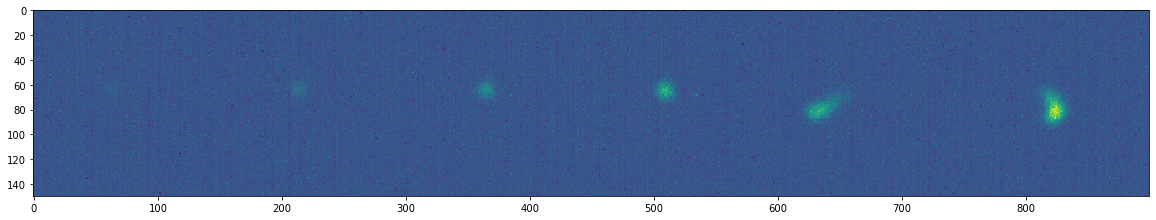

In [44]:
CLASS = 0
ENERGIES = [1, 3, 6, 10, 20, 30]
paths = []
for e in ENERGIES:
    vals = images[(images['class'] == CLASS) & (images['energy'] == e)]['path']
    paths.append(vals.iloc[np.random.randint(0, vals.shape[0])])

imgs = []
for p in paths:
    img = cv2.imread(p)
    imgs.append(img[225:375, 225:375, 1])
plt.figure(figsize = (20, 5))
plt.imshow(np.concatenate(imgs, axis = 1), cmap='viridis', interpolation='nearest')

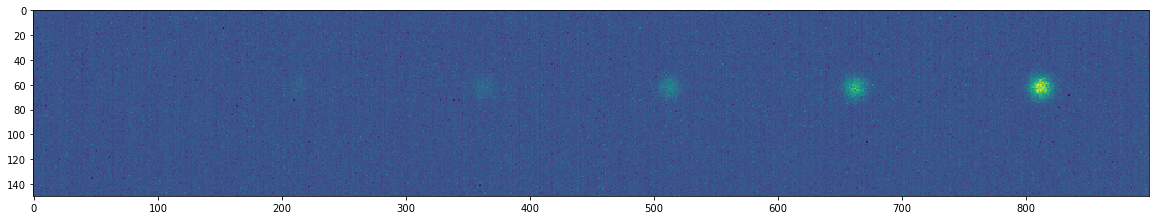

In [45]:
CLASS = 1
ENERGIES = [1, 3, 6, 10, 20, 30]
paths = []
for e in ENERGIES:
    vals = images[(images['class'] == CLASS) & (images['energy'] == e)]['path']
    paths.append(vals.iloc[np.random.randint(0, vals.shape[0])])

imgs = []
for p in paths:
    img = cv2.imread(p)
    imgs.append(img[225:375, 225:375, 1])
plt.figure(figsize = (20, 5))
plt.imshow(np.concatenate(imgs, axis = 1), cmap='viridis', interpolation='nearest')

HE 6


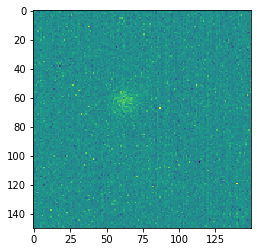

HE 1


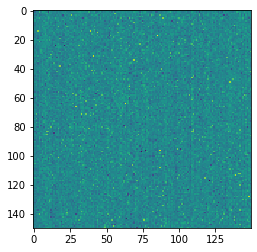

HE 6


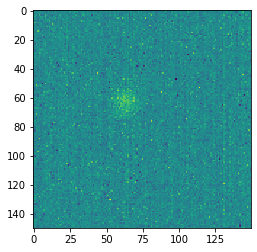

HE 1


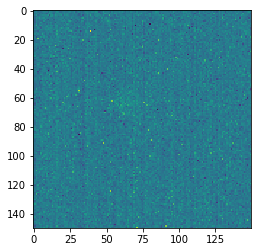

HE 6


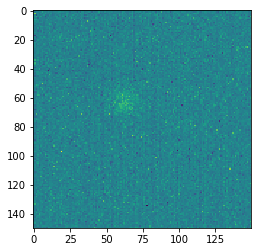

HE 6


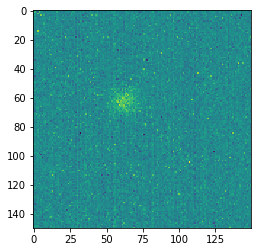

HE 1


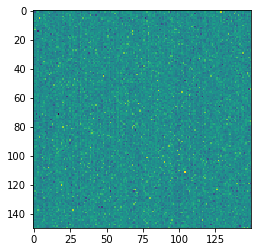

HE 1


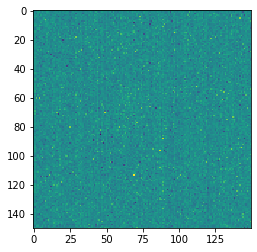

HE 6


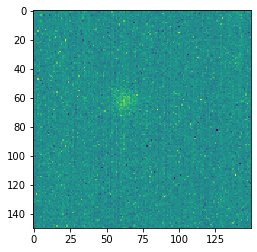

HE 20


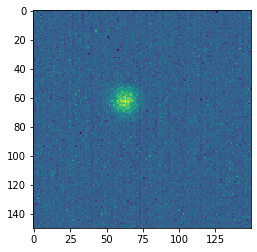

HE 20


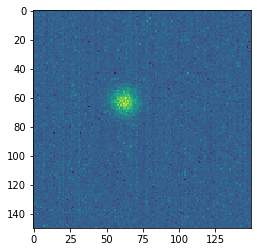

HE 6


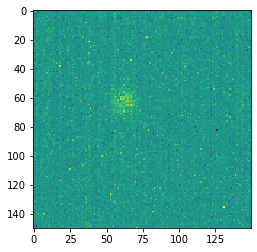

HE 20


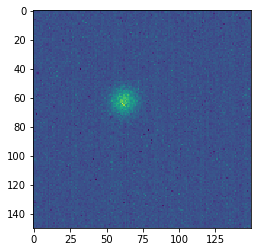

HE 6


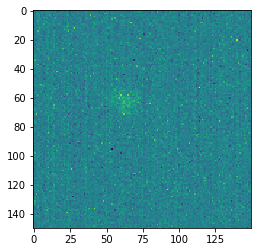

HE 1


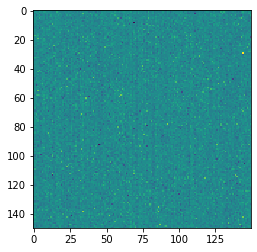

HE 1


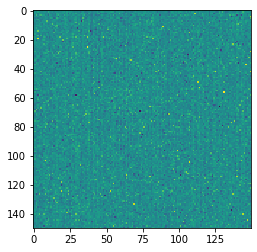

HE 6


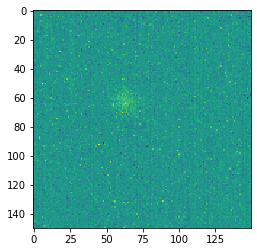

HE 1


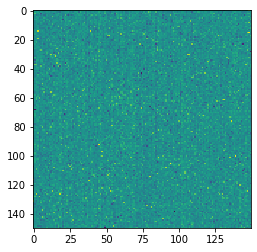

HE 20


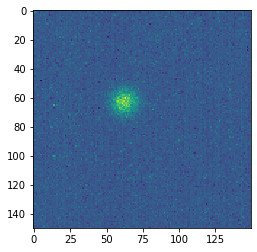

HE 6


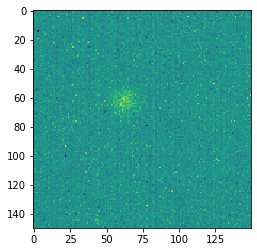

HE 1


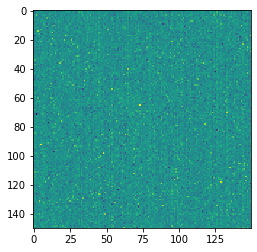

HE 1


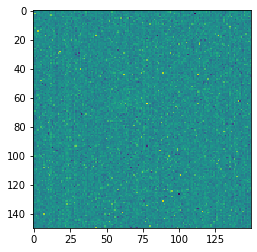

HE 1


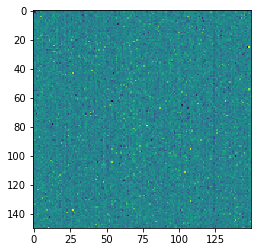

HE 20


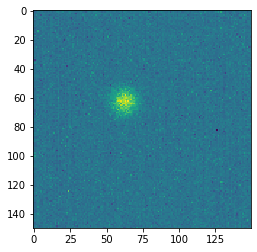

HE 1


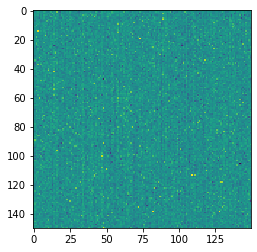

HE 20


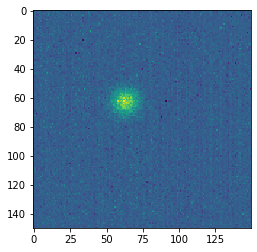

HE 1


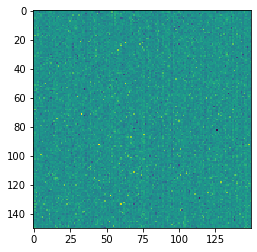

HE 6


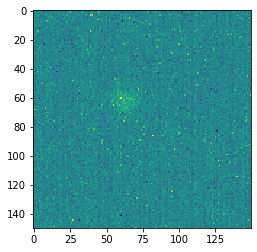

HE 6


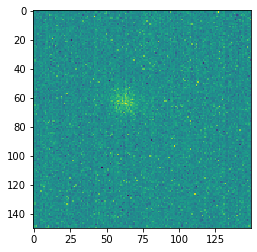

HE 1


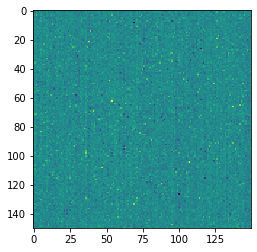

HE 6


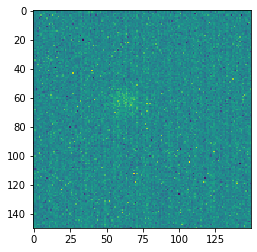

HE 6


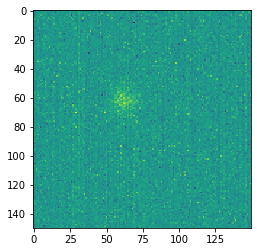

HE 1


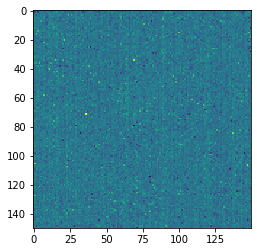

HE 6


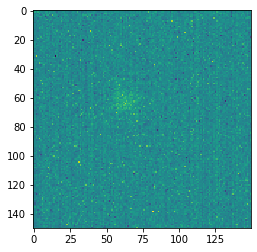

HE 20


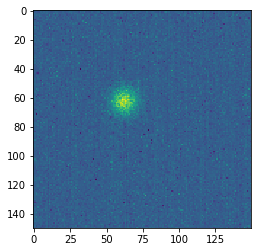

HE 1


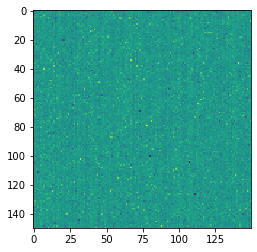

HE 20


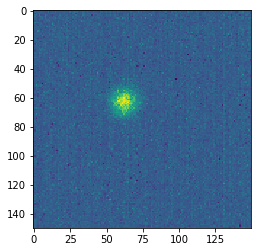

HE 20


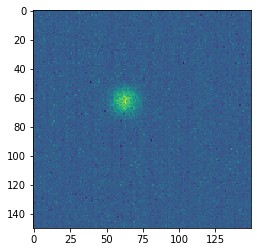

HE 1


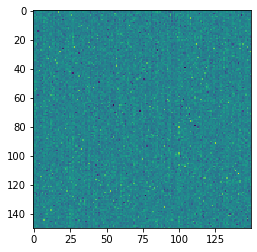

HE 1


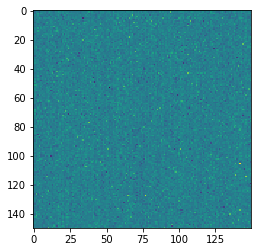

HE 6


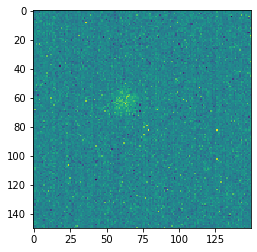

HE 6


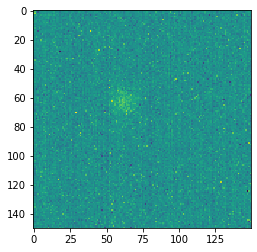

HE 6


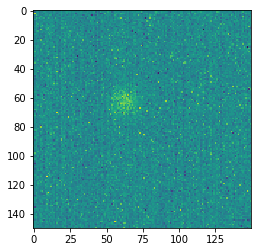

HE 20


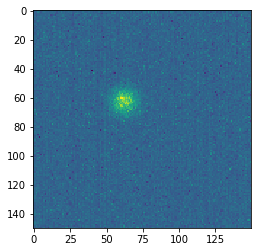

HE 20


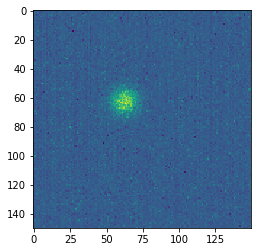

HE 1


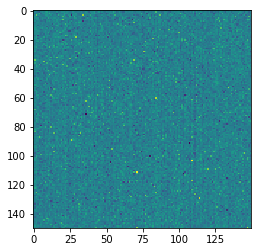

HE 20


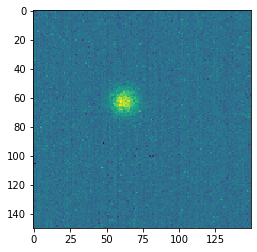

HE 6


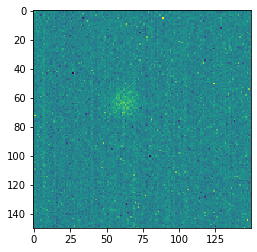

HE 1


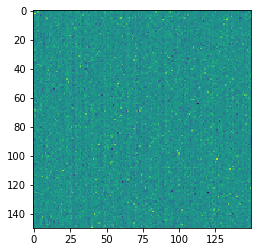

HE 1


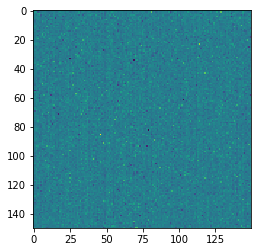

HE 1


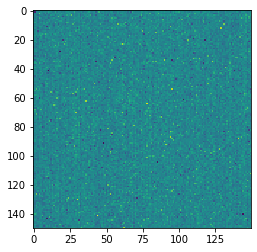

HE 1


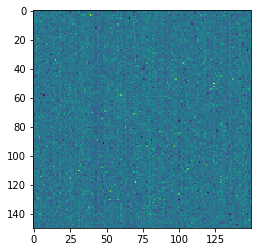

HE 6


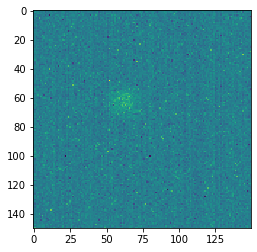

HE 6


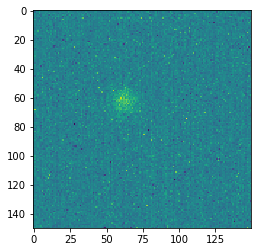

HE 20


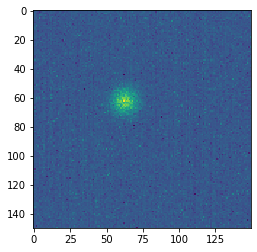

HE 6


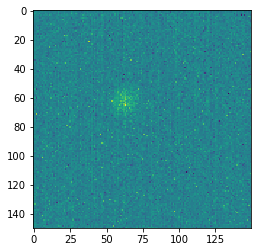

HE 20


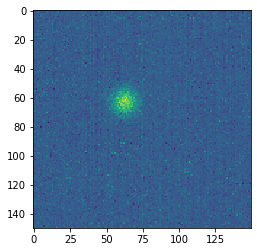

HE 1


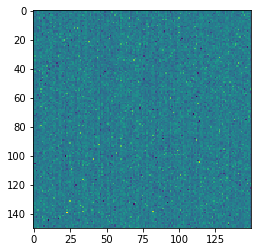

HE 1


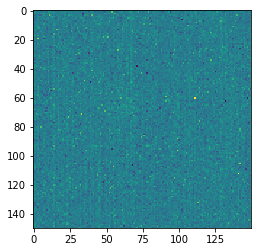

HE 6


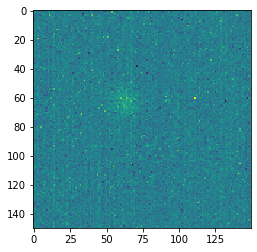

HE 20


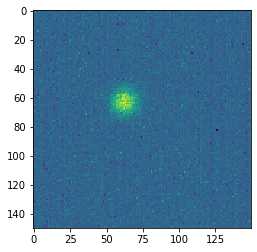

HE 20


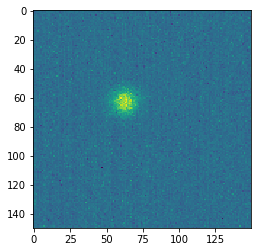

HE 20


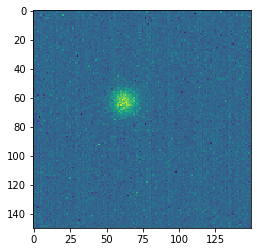

HE 1


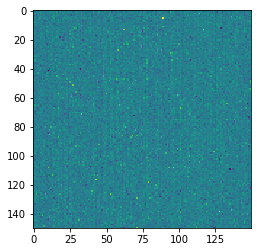

HE 6


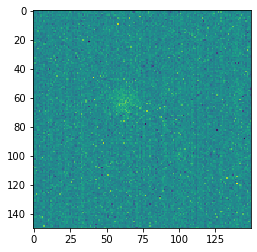

HE 20


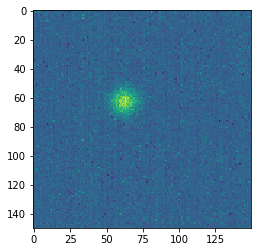

HE 20


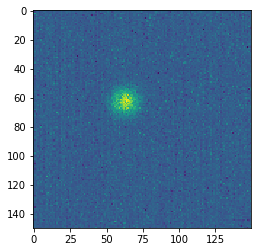

HE 6


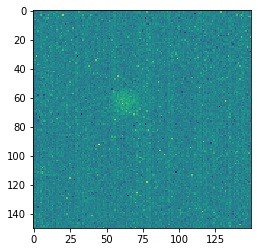

HE 6


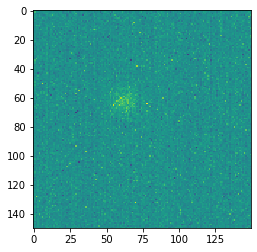

HE 6


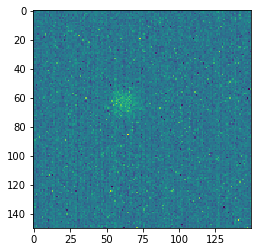

HE 6


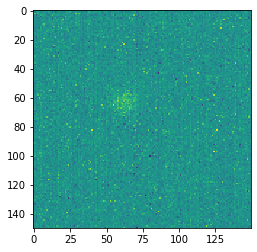

HE 6


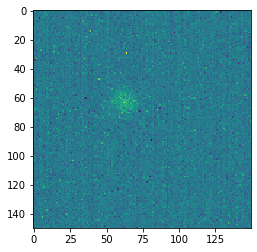

HE 20


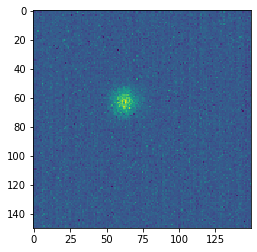

HE 6


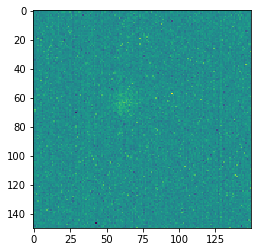

HE 1


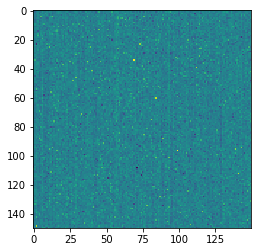

HE 1


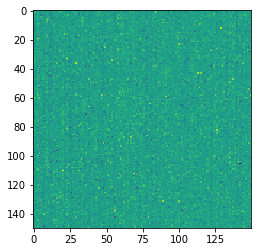

HE 6


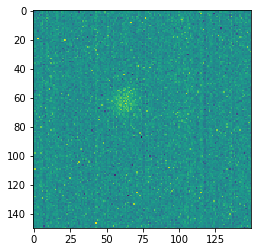

HE 6


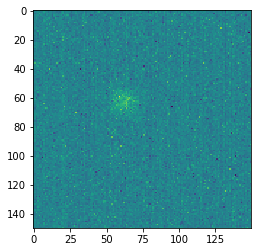

HE 6


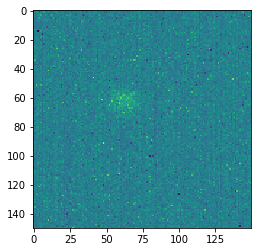

HE 1


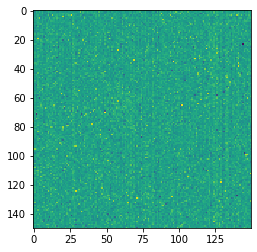

HE 6


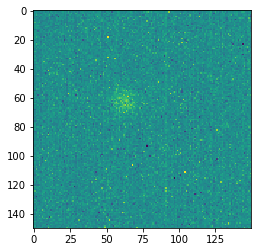

HE 6


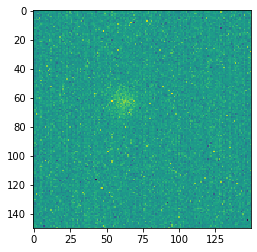

HE 6


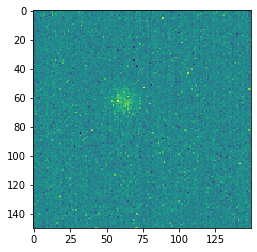

HE 6


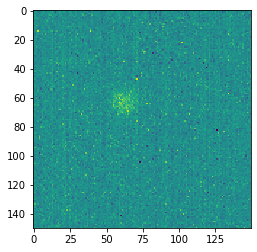

HE 20


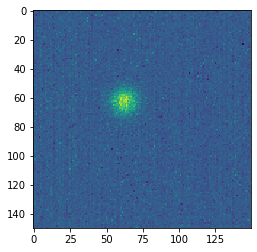

HE 20


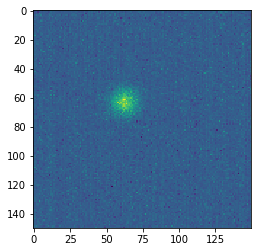

HE 20


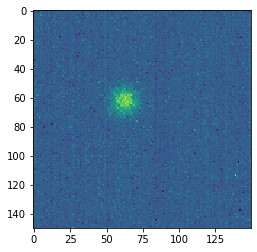

HE 6


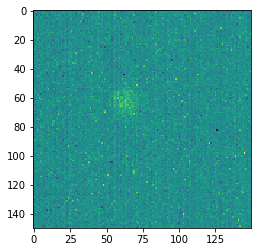

HE 1


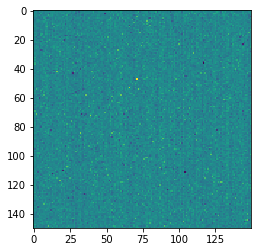

HE 1


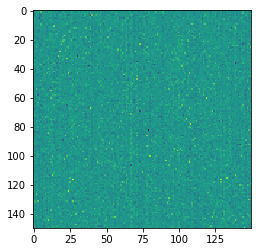

HE 20


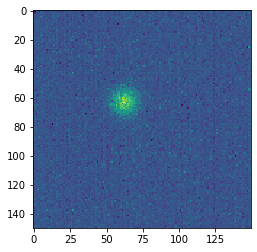

HE 20


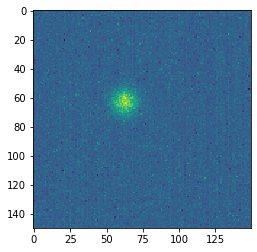

HE 6


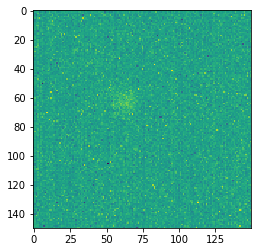

HE 1


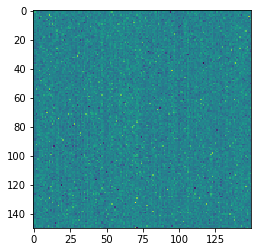

HE 6


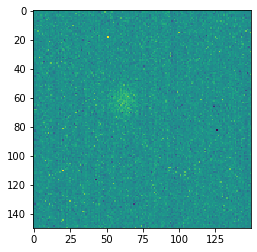

HE 6


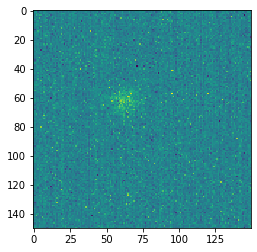

HE 20


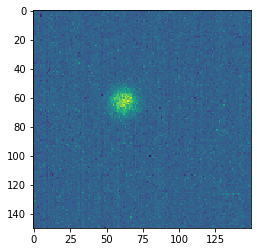

HE 20


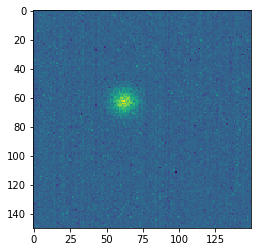

HE 6


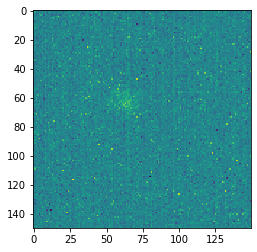

HE 1


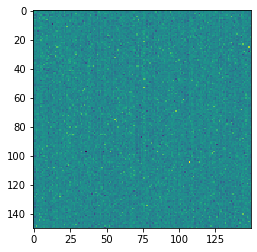

In [9]:
for (i, d) in images.iloc[7500:7500+100].iterrows():
    img = cv2.imread(d['path'])[225:375, 225:375, 0]
    particleClass = 'ER' if d['class'] == 0 else 'HE'
    print(particleClass, d['energy'])
    plt.imshow(img, cmap='viridis', interpolation='nearest')
    plt.show()
